In [1]:
import spacy
import matplotlib.pyplot as plt

In [2]:
nlp = spacy.load("en_core_web_sm")

In [3]:
def frequency_counts(file_path, sample_size, max_range):
    with open(file_path, 'r') as file:
        text = file.read()
        doc = nlp(text)
        word_lengths = [len(token.text) for token in doc if token.is_alpha]
        frequencies = {}
        for length in word_lengths[:sample_size]:
            if length not in frequencies:
                frequencies[length] = 1
            else:
                frequencies[length] += 1
        for key in range(1,max_range):
            frequencies.setdefault(key,0)
        return frequencies

# Word frequencies of EH by section

In [11]:
# Get the frequency of word lengths for each section of EH

sample_size = 1200
# This is the word count of the shortest section (EH0) rounded down

max_range = 18

frequencies = []

for i in range(5):
    file_path = "/Users/briandomino/Documents/Python/EH related/stylometry/Mendenhall/EH sections in English/EH{}.txt".format(i)
    frequencies.append(frequency_counts(file_path, sample_size, max_range))



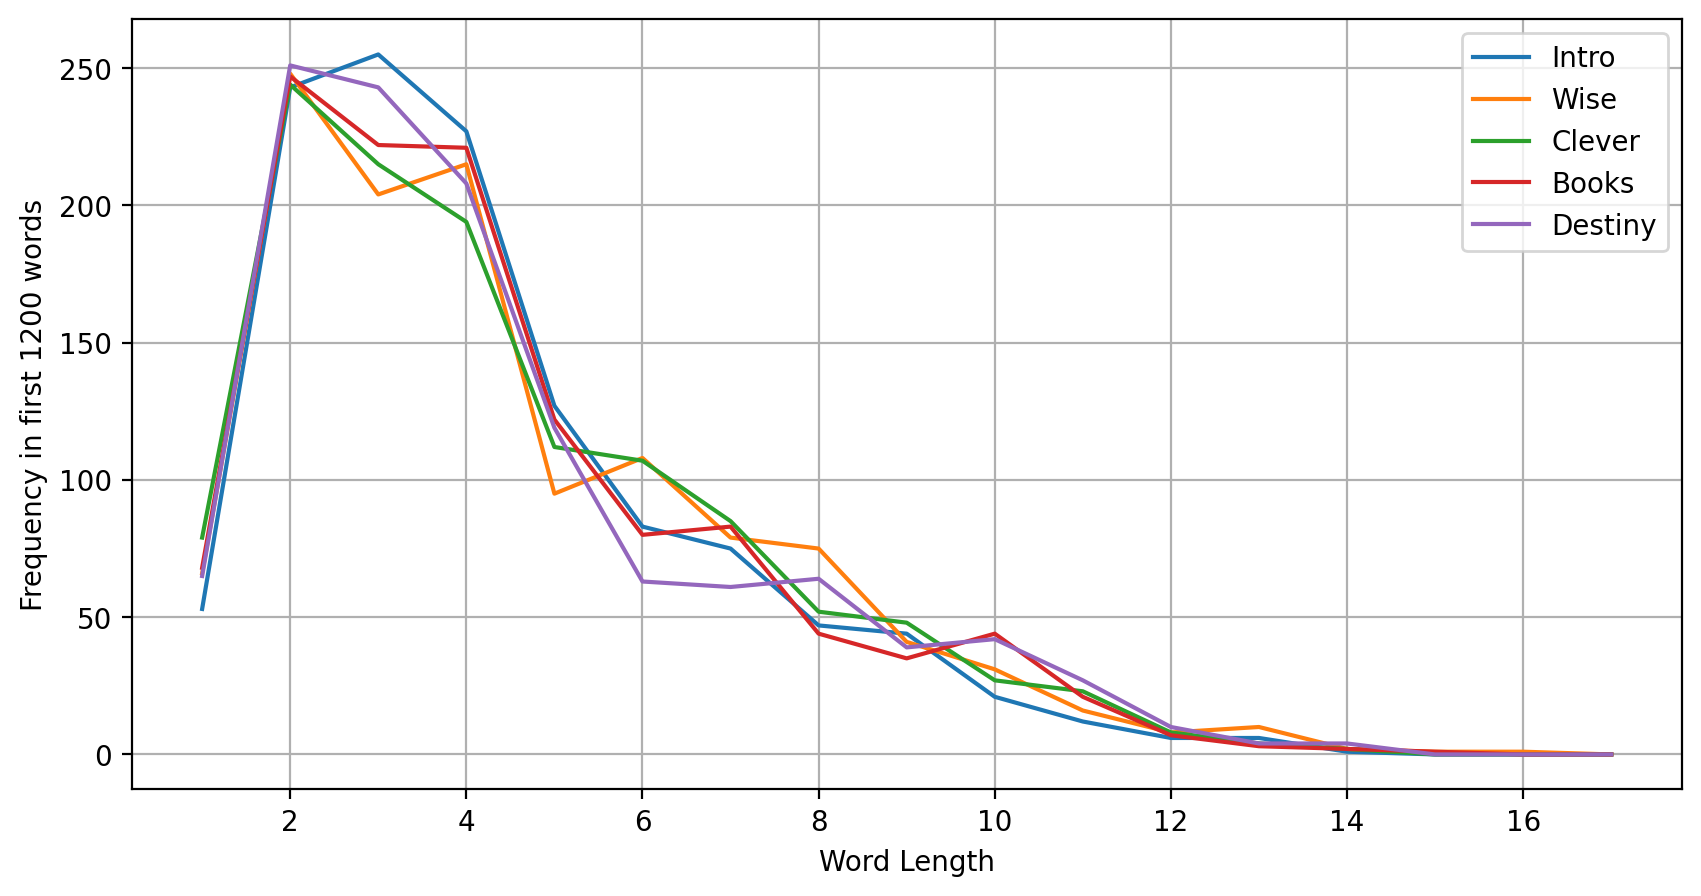

In [12]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 200

labels = ['Intro', 'Wise', 'Clever', 'Books', 'Destiny']
yaxis_label = "Frequency in first " + str(sample_size) + " words"

for frequency, label in zip(frequencies, labels):
    plt.plot(range(1, max_range), [frequency[key] for key in range(1, max_range)], label=label)

plt.xlabel("Word Length")
plt.ylabel(yaxis_label)
plt.legend()
plt.grid()
plt.show()

# Compare EH with FW and GD

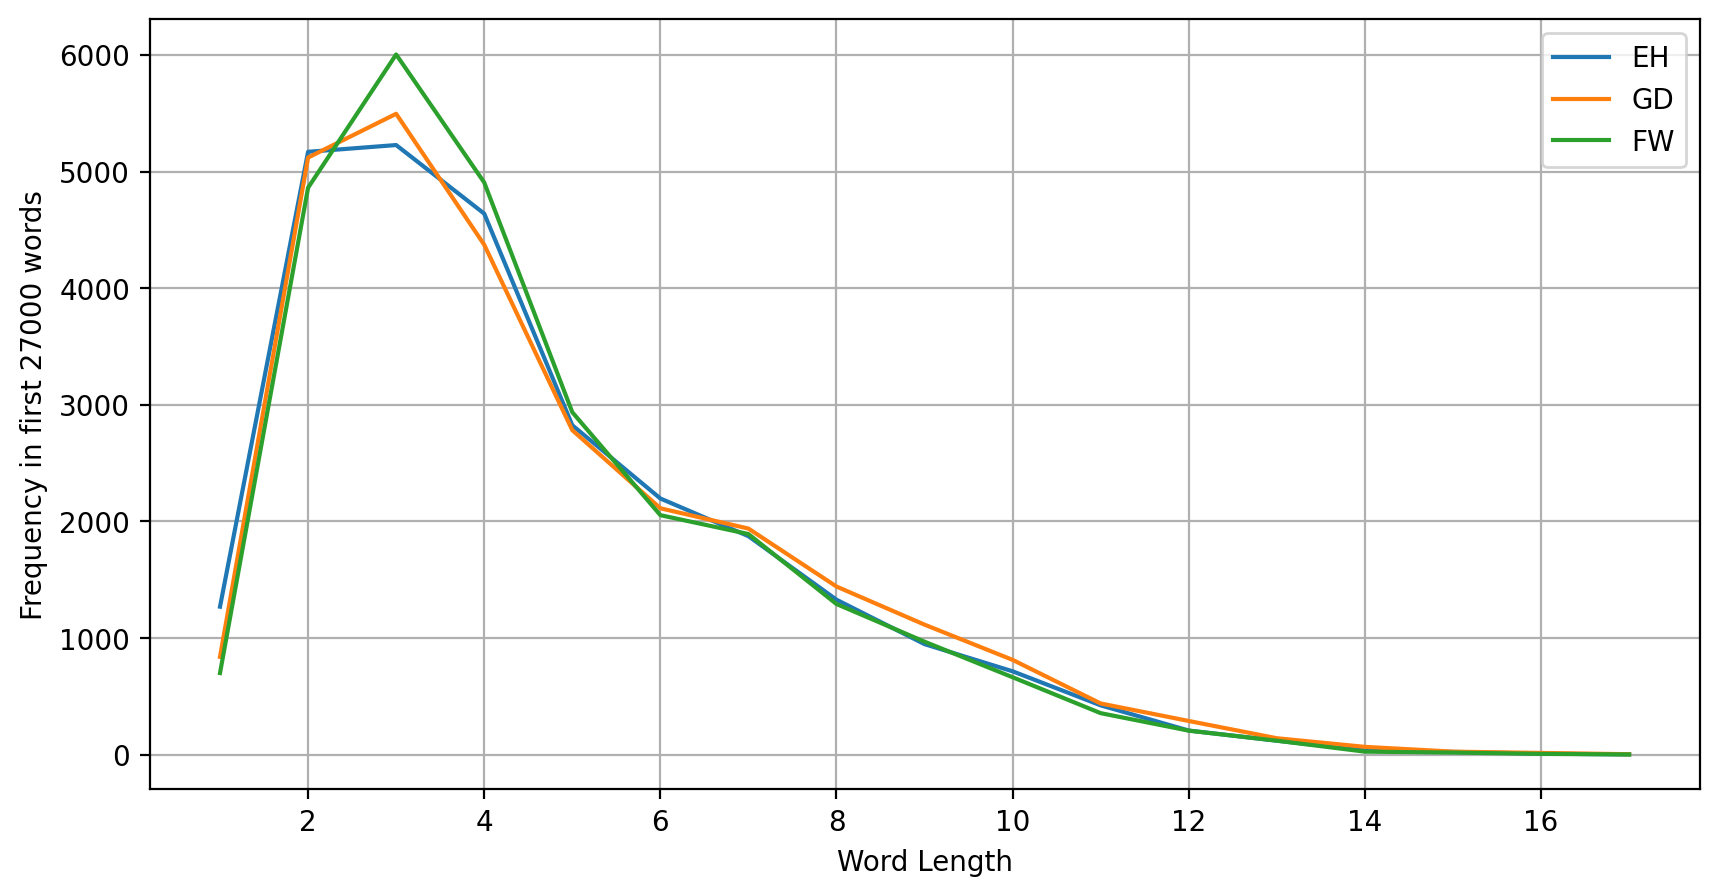

In [9]:
sample_size = 27000
# USe no more than 27000, the length of the shortest file
max_range = 18
yaxis_label = "Frequency in first " + str(sample_size) + " words"

frequencyEH = frequency_counts('/Users/briandomino/Documents/Python/EH related/Friedrich Nietzsche, Walter Kaufmann Ecce Homo-Vintage (1989).txt', sample_size, max_range)
frequencyGD = frequency_counts('/Users/briandomino/Documents/Python/My own text analysis projects/FNCorpra/GD Kaufmann trans.txt', sample_size, max_range)
frequencyFW = frequency_counts('/Users/briandomino/Documents/Python/EH related/BookNLP/FW_Kaufmann.txt', sample_size, max_range)

plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 200

plt.plot(range(1,max_range), [frequencyEH[key] for key in range(1, max_range)], label='EH')
plt.plot(range(1,max_range), [frequencyGD[key] for key in range(1, max_range)], label='GD')
plt.plot(range(1,max_range), [frequencyFW[key] for key in range(1, max_range)], label='FW')
plt.xlabel("Word Length")
plt.ylabel(yaxis_label)
plt.legend()
plt.grid()
plt.show()

## Now let's try this with German texts.

### To make this a fair comparison, files will be from Project Gutenberg when possible.

In [4]:
# This function compiles the text files associated with a single author into a single string
def read_files_into_string(filenames):
    strings = []
    for filename in filenames:
        with open(f'/Users/briandomino/Documents/Python/EH related/stylometry/texts/{filename}.txt') as f:
            strings.append(f.read())
    return '\n'.join(strings)

In [5]:
with open('/Users/briandomino/Documents/Python/EH related/stylometry/texts/7205.txt', 'r') as file:
    ASZ = file.read()

In [6]:
with open('/Users/briandomino/Documents/Python/EH related/stylometry/texts/7207.txt', 'r') as file:
    MAM = file.read()

In [7]:
with open('/Users/briandomino/Documents/Python/EH related/stylometry/texts/27769.txt', 'r') as file:
    Wagner = file.read()

In [8]:
filenames = '24249', '39792', '45600'
Heine = read_files_into_string(filenames)
with open('Heine_corpus.txt', 'w+') as fh:
    fh.write(Heine)

In [9]:
filenames = '7202', '7207'
Nietzsche = read_files_into_string(filenames)
with open('Nietzsche_corpus.txt', 'w+') as fh:
    fh.write(Nietzsche)

In [10]:
nlp = spacy.load("de_core_news_sm")

# Increase the maximum file size because of Wagner's Mein Leben
nlp.max_length = 1500000

In [11]:
sample_size = 10000

In [12]:
ASZ_freq = frequency_counts('/Users/briandomino/Documents/Python/EH related/stylometry/texts/7205.txt', sample_size, 26)
Heine_freq = frequency_counts('/Users/briandomino/Documents/Python/EH related/stylometry/Mendenhall/Heine_corpus.txt', sample_size, 26)
Nietzsche_freq = frequency_counts('/Users/briandomino/Documents/Python/EH related/stylometry/Mendenhall/Nietzsche_corpus.txt', sample_size, 26)
Schopenhauer_freq = frequency_counts('/Users/briandomino/Documents/Python/EH related/stylometry/texts/47406.txt', sample_size, 26)
# Wagner_freq = frequency_counts('/Users/briandomino/Documents/Python/EH related/stylometry/texts/27769.txt', sample_size, 26)
# Der Fliegende Hollaender, the only text by Wagner in German available, but it's too short
Wagner_freq = frequency_counts('/Users/briandomino/Documents/Python/EH related/stylometry/texts/meinleben02wagner_google_cleaned.txt', sample_size, 26)

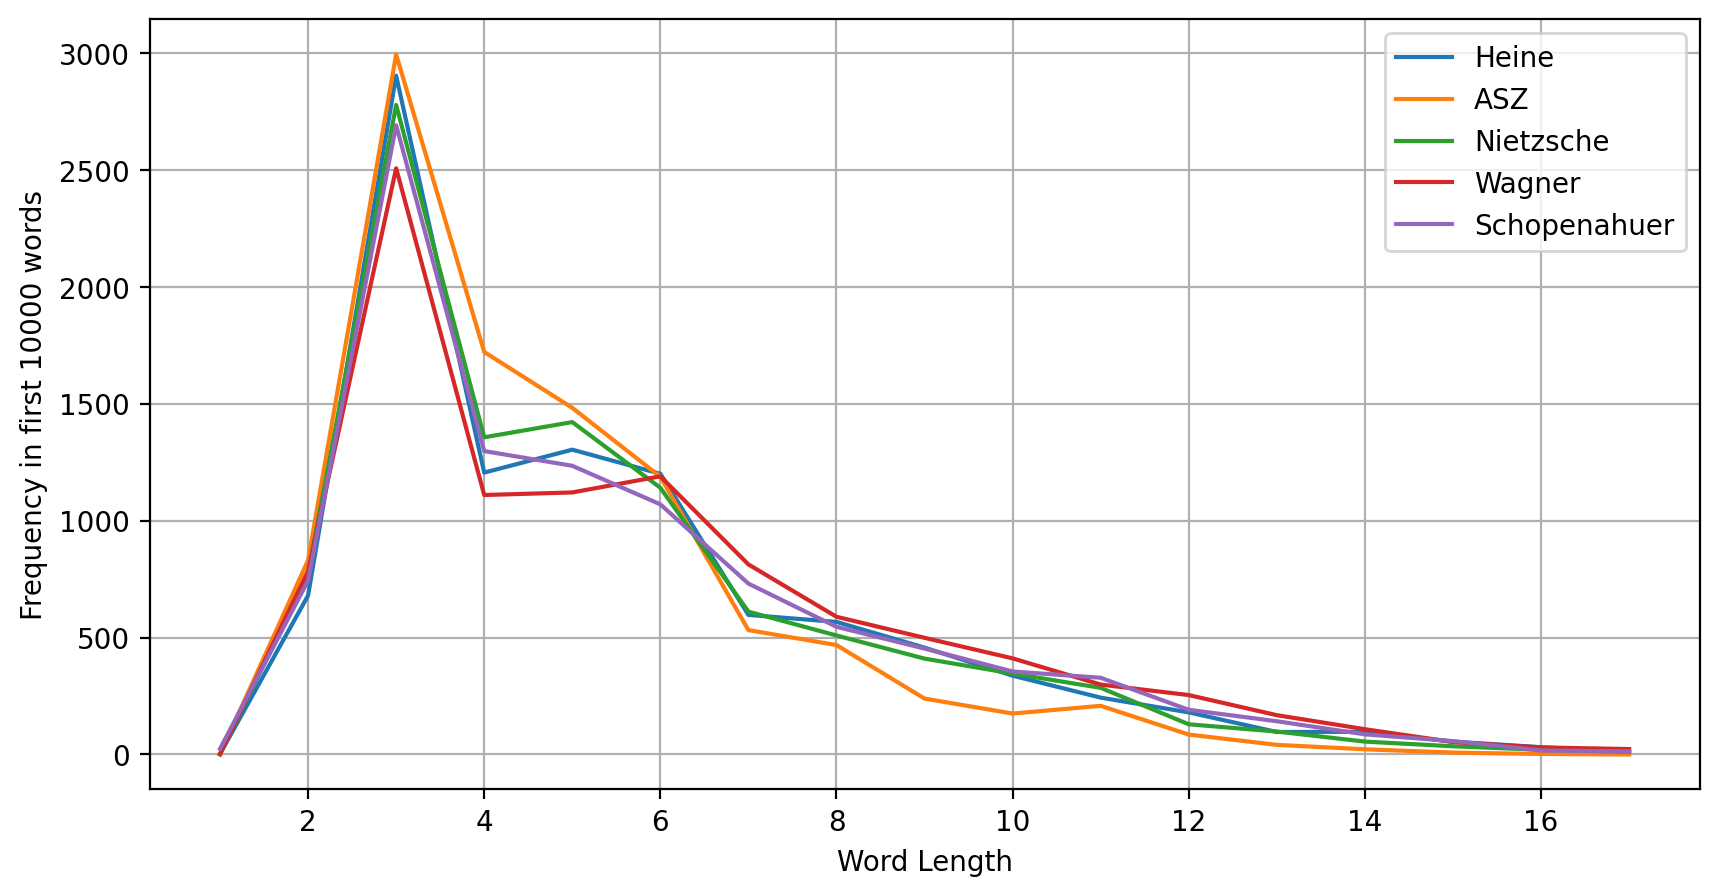

In [13]:
max_range = 18
yaxis_label = "Frequency in first " + str(sample_size) + " words"

plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 200
plt.plot(range(1,max_range), [Heine_freq[key] for key in range(1, max_range)], label='Heine')
plt.plot(range(1,max_range), [ASZ_freq[key] for key in range(1, max_range)], label='ASZ')
plt.plot(range(1,max_range), [Nietzsche_freq[key] for key in range(1, max_range)], label='Nietzsche')
plt.plot(range(1,max_range), [Wagner_freq[key] for key in range(1,max_range)], label='Wagner')
plt.plot(range(1,max_range), [Schopenhauer_freq[key] for key in range(1,max_range)], label='Schopenahuer')
plt.xlabel("Word Length")
plt.ylabel(yaxis_label)
plt.legend()
plt.grid()
plt.show()

### It looks like Nietzsche and Heine are the best matches for ASZ, so let's plot just the three of them.

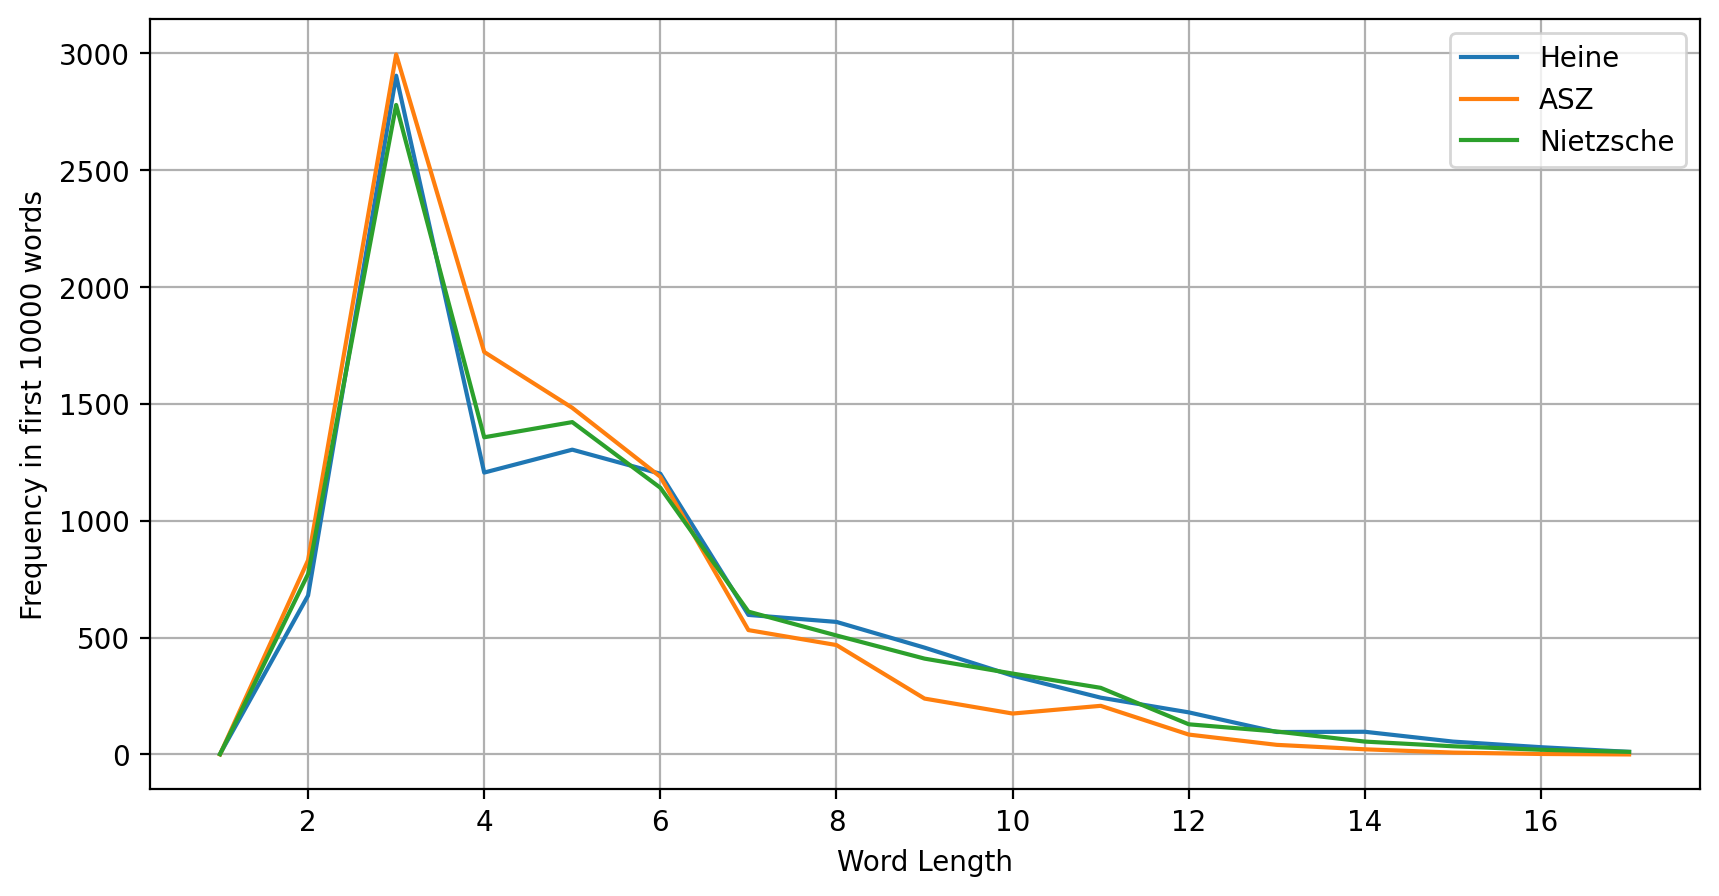

In [14]:
max_range = 18

plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 200
plt.plot(range(1,max_range), [Heine_freq[key] for key in range(1, max_range)], label='Heine')
plt.plot(range(1,max_range), [ASZ_freq[key] for key in range(1, max_range)], label='ASZ')
plt.plot(range(1,max_range), [Nietzsche_freq[key] for key in range(1, max_range)], label='Nietzsche')
plt.xlabel("Word Length")
plt.ylabel(yaxis_label)
plt.legend()
plt.grid()
plt.show()

# Lastly, we need to compare ASZ with MAM

In [15]:
MAM_freq = frequency_counts('/Users/briandomino/Documents/Python/EH related/stylometry/texts/7207.txt', sample_size, 26)

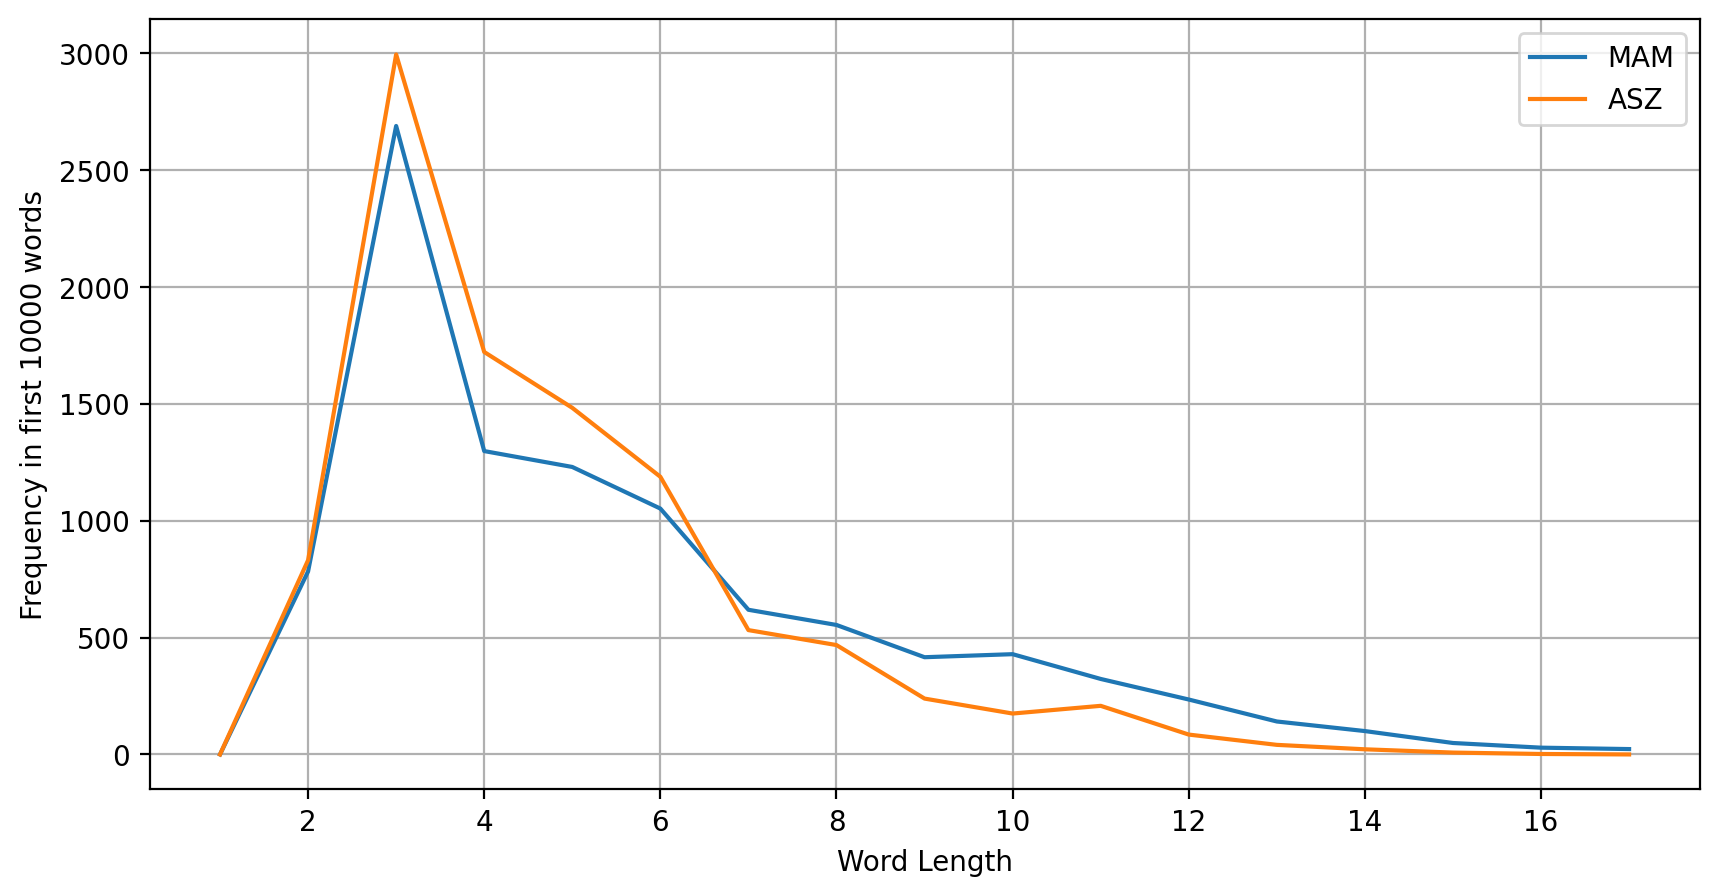

In [16]:
max_range = 18

plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 200
plt.plot(range(1,max_range), [MAM_freq[key] for key in range(1, max_range)], label='MAM')
plt.plot(range(1,max_range), [ASZ_freq[key] for key in range(1, max_range)], label='ASZ')
plt.xlabel("Word Length")
plt.ylabel(yaxis_label)
plt.legend()
plt.grid()
plt.show()